## Projekti 3: Markovin varasto -tekniikka

Vuosikymmenten ajan ympäristön melua on pidetty kvanttiteknologian arkkivihollisena. Usein vuorovaikutukset kvanttisysteemin ja ympäristön välillä johtavat kvanttiominaisuuksien nopeaan häviämiseen ja ikävästi juuri lomittumisen ja koherenssin menetykseen, jotka olisivat keskeisiä kvanttiedun tarjoajia. 
Näkökulma tähän muuttui merkittävästi, kun fyysikot osoittivat, että muokkaamalla keinotekoista ympäristöä sopivalla tavalla (quantum reservoir engineering) systeemiä voidaan ohjata kohti haluttua tilaa, kuten vaikka maksimaalisesti lomittunutta tilaa [[J. T. Barreiro, et al., Nature 470, 486 (2011)](https://doi.org/10.1038/nature09801),[ J. T. Barreiro et al., Nat. Phys. 6, 943 (2010)](https://doi.org/10.1038/nphys1781)]. Näin ollen ajatus ympäristöstä kvanttiteknologian vihollisena kääntyi aivan päälaelleen.

Seurailemme tutkimusta [J. T. Barreiro, et al., Nature 470, 486 (2011)](https://doi.org/10.1038/nature09801) ja simuloimme kokeellisesti puoliryhmän Markovin mestariyhtälön kahden kubitin avoimelle systeemille, jolla on asymptoottisena, stationaarisena tilana Bellin tila $|\psi^- \rangle = \frac{1}{\sqrt{2} }(|01\rangle - |10\rangle)$, jossa $|0\rangle$ ja $|1\rangle$ muodostavat kubittien laskennallisen kannan. Käytämme merkintää $| 01\rangle = |0\rangle_1 |1\rangle _2$. Näin ollen voimme valmistaa maksimaalisen lomittuneen tilan systeemin luonnollisen kehityksen, eli tässä tapauksessa avoimen systeemin dissipatiivisen dynamiikan tuloksena. 

The four Bell states are:

\begin{align}
|\psi^- \rangle = \frac{1}{\sqrt{2} }(|01\rangle - |10\rangle) \\
|\psi^+ \rangle = \frac{1}{\sqrt{2} }(|01\rangle + |10\rangle) \\
|\phi^- \rangle = \frac{1}{\sqrt{2} }(|00\rangle - |11\rangle)  \\
|\phi^+ \rangle = \frac{1}{\sqrt{2} }(|00\rangle + |11\rangle) 
\end{align}

Each of them is uniquely determined as an eigenstate with eigenvalues $\pm1$ with respect to $\sigma_z^{(1)} \otimes \sigma_z^{(2)}$ and  $\sigma_x^{(1)}\otimes\sigma_x^{(2)}$, where $\sigma_x^{(i)}$ and $\sigma_z^{(i)}$, with $i=1,2$, are the $x$ and $z$ Pauli operators of qubit 1 and 2.

The dissipative dynamics that pumps two qubits from an arbitrary initial state into the Bell state $|\psi^- \rangle $ is realised by the composition of two channels that pump from
the $+1$ into the $-1$ eigenspaces of the stabiliser operators $\sigma_z^{(1)} \otimes \sigma_z^{(2)}$ and  $\sigma_x^{(1)} \otimes \sigma_x^{(2)}$. 

Specifically, we consider the two $p$-parametrised families of CPTP maps $\Phi_{zz} \rho_S = E_{1z}  \rho_S  E_{1z}^{\dagger} + E_{2z}  \rho_S  E_{2z}^{\dagger} $, with 

\begin{equation}
\begin{aligned}
E_{1z} &=\sqrt{p} \mathbb{I}^{(1)} \otimes \sigma_x^{(2)} \frac{1}{2}\left( \mathbb{I}+ \sigma_z^{(1)} \otimes \sigma_z^{(2)} \right), \\
E_{2z}  &= \frac{1}{2} \left( \mathbb{I}-\sigma_z^{(1)}\otimes\sigma_z^{(2)} \right) \\
&+ \sqrt{1-p} \frac{1}{2} \left( \mathbb{I}+ \sigma_z^{(1)}\otimes\sigma_z^{(2)} \right),
\end{aligned}
\end{equation}

and $\Phi_{xx}\rho_S = E_{1x}  \rho_S  E_{1x}^{\dagger} + E_{2x}  \rho_S  E_{2x}^{\dagger} $, where $E_{1x}$ and $E_{2x}$ have the same form of  $E_{1z}$ and $E_{2z}$ in equations, provided that we replace $\sigma_x^{(2)}$ with $\sigma_z^{(2)}$ and $\sigma_z^{(1)}\otimes\sigma_z^{(2)}$ with $\sigma_x^{(1)}\otimes\sigma_x^{(2)}$.

By changing the parameter $0 \le p \le 1$ we simulate different types of open quantum system dynamics. For $p\ll1$, the repeated application of, e.g., $\Phi_{zz}$ generates a master equation of Lindblad form with jump operator $V=\frac{1}{2}  \mathbb{I}^{(1)}\otimes\sigma_x^{(2)}\left( \mathbb{I}+ \sigma_z^{(1)} \otimes \sigma_z^{(2)} \right)$. For $p=1$, the map $\Phi_{xx} \circ \Phi_{zz}$ generates $|\psi_- \rangle $ for any initial state. 

### Circuit implementation <a id='circuit'></a>

In [J. T. Barreiro, et al., Nature 470, 486 (2011)](https://doi.org/10.1038/nature09801), the authors provide the circuits for the implementation of the Bell-state pumping. However, these are composed of gates that are natural to the trapped-ions platform used in that work, so their direct implementation on the IBM's quantum devices would result in far too long circuits. Therefore, we propose a different set of circuits that follow the same basic working principles, but have been designed specifically keeping in mind the characteristics of the IBM devices.

The pumping circuits are composed of four parts:

   1. The relevant information regarding the state of the system (that is, whether the system is in the $+1$ or the $-1$ eigenspaces of the stabiliser operators) is mapped into an ancilla.

   2. The state of the system is modified depending on the state of the ancilla.

   3. The mapping circuit is reversed. 

   4. At this stage, the system has been pumped, but if the ancilla is to be used again for a new pumping cycle, it needs to be reset, which is the fourth step. 

We follow these same lines, designing circuits that perform these same steps while minimising the number of gates involved. Before we explain the resulting circuits, let us mention that, since not all IBM devices are equipped with the reset operation (which is quite noisy in any case), we must use a different ancilla for every pump.

The way we map the eigenspace information into an ancilla is by first applying a CNOT gate between the system qubits. Suppose that qubits $s_1$ and $s_2$ are initially in some Bell state, for instance, $| \phi^{\pm} \rangle = (| 00 \rangle \pm | 11 \rangle)/\sqrt{2}$. A CNOT gate controlled by $s_1$ transforms the state into $|\pm\rangle|0\rangle$. Instead, $| \psi^{\pm} \rangle$ would be transformed into $|\pm\rangle|1\rangle$. Hence, we see that the information regarding the $\sigma_x^{(1)}\otimes\sigma_x^{(2)}$ eigenspace (namely, the sign) is contained in the state of $s_1$ after the transformation, whereas the one corresponding to the $\sigma_z^{(1)}\otimes\sigma_z^{(2)}$ is in qubit $s_2$. 

Now, let us consider the circuit implementing the $\sigma_z^{(1)}\otimes\sigma_z^{(2)}$ pump:

In [1]:
from qiskit import QuantumRegister, QuantumCircuit
import numpy as np

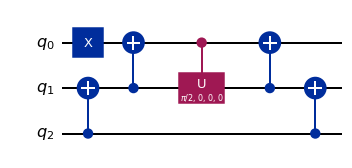

In [2]:
#######################
#       ZZ pump       #
#######################

# Quantum register
q = QuantumRegister(3, name='q')

# Quantum circuit  
zz = QuantumCircuit(q)

# ZZ pump acting on system qubits
## Qubit identification
system = [2, 1]
a_zz = 0

## Define pump efficiency 
## and corresponding rotation
p = 0.5
theta = 2 * np.arcsin(np.sqrt(p))

## Construct circuit
### Map information to ancilla
zz.cx(q[system[0]], q[system[1]])
zz.x(q[a_zz])
zz.cx(q[system[1]], q[a_zz])
    
### Conditional rotation
zz.cu(theta, 0.0, 0.0, 0, q[a_zz], q[system[1]])
    
### Inverse mapping
zz.cx(q[system[1]], q[a_zz])
zz.cx(q[system[0]], q[system[1]])

# Draw circuit
zz.draw(output='mpl')

To map the eigenspace information into the environment ancilla $a_\textrm{ZZ}$, we apply a CNOT controlled by the relevant qubit, $s_2$. After these two gates (and considering that the initial state of the ancilla is $|1\rangle$), $a_\textrm{ZZ}$ will be in state $|1\rangle$ if the initial state of the system is $| \phi^{\pm} \rangle$ and $|0\rangle$ if it is $| \psi^{\pm} \rangle$. Therefore, the conditional rotation gate only acts in the former case, while it does not modify the state in the latter. The angle of the controlled rotation, in turn, controls the efficiency of the pump $p$ via the relation $\theta = 2 \arcsin{\sqrt{p} }$. Finally, the last two CNOT gates simply revert the mapping part of the circuit. 

The working principle of the $\sigma_x^{(1)}\otimes\sigma_x^{(2)}$ pump is essentially the same. However, we need to add an extra Hadamard gate to transform the state of $s_1$ before mapping the information to the ancilla $a_\textrm{XX}$:

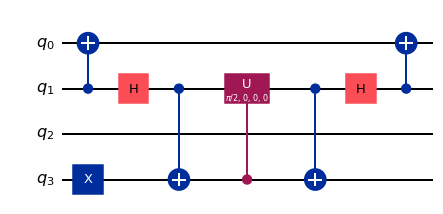

In [3]:
#######################
#       XX pump       #
#######################

# Quantum register
q = QuantumRegister(4, name='q')

# Quantum circuit  
xx = QuantumCircuit(q)

# XX pump acting on system qubits
## Qubit identification
system = [1, 0]
a_xx = 3

## Define pump efficiency 
## and corresponding rotation
p = 0.5
theta = 2 * np.arcsin(np.sqrt(p))

## Construct circuit
### Map information to ancilla
xx.cx(q[system[0]], q[system[1]])
xx.h(q[system[0]])
xx.x(q[a_xx])
xx.cx(q[system[0]], q[a_xx])
    
### Conditional rotation
xx.cu(theta, 0.0, 0.0, 0, q[a_xx], q[system[0]])
    
### Inverse mapping
xx.cx(q[system[0]], q[a_xx])
xx.h(q[system[0]])
xx.cx(q[system[0]], q[system[1]])

# Draw circuit
xx.draw(output='mpl')

As for the composite pump, we can simply concatenate the two circuits. Notice that in the direct concatenation there would be two consecutive CNOTs between the system qubits, which can be removed.

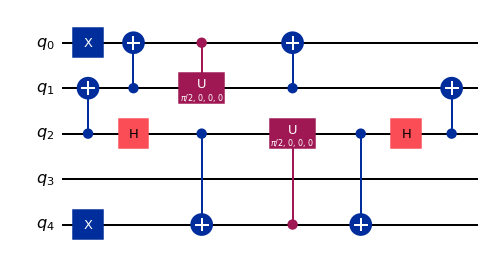

In [4]:
###########################
#       ZZ-XX pumps       #
###########################

# Quantum register
q = QuantumRegister(5, name='q')

# Quantum circuit  
zz_xx = QuantumCircuit(q)

# ZZ and XX pumps acting on system qubits
## Qubit identification
system = [2, 1]
a_zz = 0
a_xx = 4

## Define pump efficiency 
## and corresponding rotation
p = 0.5
theta = 2 * np.arcsin(np.sqrt(p))

## Construct circuit
## ZZ pump
### Map information to ancilla
zz_xx.cx(q[system[0]], q[system[1]])
zz_xx.x(q[a_zz])
zz_xx.cx(q[system[1]], q[a_zz])
    
### Conditional rotation
zz_xx.cu(theta, 0.0, 0.0, 0, q[a_zz], q[system[1]])
    
### Inverse mapping
zz_xx.cx(q[system[1]], q[a_zz])
#zz_xx.cx(q[system[0]], q[system[1]])

## XX pump
### Map information to ancilla
#zz_xx.cx(q[system[0]], q[system[1]])
zz_xx.h(q[system[0]])
zz_xx.x(q[a_xx])
zz_xx.cx(q[system[0]], q[a_xx])
    
### Conditional rotation
zz_xx.cu(theta, 0.0, 0.0, 0, q[a_xx], q[system[0]])
    
### Inverse mapping
zz_xx.cx(q[system[0]], q[a_xx])
zz_xx.h(q[system[0]])
zz_xx.cx(q[system[0]], q[system[1]])

# Draw circuit
zz_xx.draw(output='mpl')

The overall goal of this project is to use these circuits to drive the state of the system from maximally mixed to $|\psi^-\rangle$. In this project, we will not use the tomographic reconstruction of the two-qubit state; instead, we will measure the populations of the four Bell states by changing basis.

### Task 1 (1p)
Write three functions, one for each channel (ZZ, XX, and their composition), returning a quantum circuit implementing the channel on the system qubits for a given value of the efficiency parameter $p$ (in the composition map, impose equal efficiencies for both). The circuits must include the **measurement of the system qubits in the Bell basis** by applying a CNOT and Hadamard to the relevant qubits. Tip: remove consecutive CNOT gates (and single-qubit ones) resulting in identity.

Find the suggested structure for the functions below.

In [ ]:
def zz_pump(q, c, p, system, ancilla):
    """Returns a QuantumCircuit implementing the ZZ pump channel on the system qubits
    
    Args:
        q (QuantumRegister): the register to use for the circuit
        c (ClassicalRegister): the register to use for the measurement of the system qubits
        p (float): the efficiency for the channel, between 0 and 1
        system (list): list of indices for the system qubits
        ancilla (int): index for the ancillary qubit
    
    Returns:
        A QuantumCircuit object
    """

In [ ]:
def xx_pump(q, c, p, system, ancilla):
    """Returns a QuantumCircuit implementing the XX pump channel on the system qubits
    
    Args:
        q (QuantumRegister): the register to use for the circuit
        c (ClassicalRegister): the register to use for the measurement of the system qubits
        p (float): the efficiency for the channel, between 0 and 1
        system (list): list of indices for the system qubits
        ancilla (int): index for the ancillary qubit
    
    Returns:
        A QuantumCircuit object
    """

In [ ]:
def zz_xx_pump(q, c, p, system, ancillae):
    """Returns a QuantumCircuit implementing the composition channel on the system qubits
    
    Args:
        q (QuantumRegister): the register to use for the circuit
        c (ClassicalRegister): the register to use for the measurement of the system qubits
        p (float): the efficiency for both channels, between 0 and 1
        system (list): list of indices for the system qubits
        ancillae (list): list of indices for the ancillary qubits
    
    Returns:
        A QuantumCircuit object
    """

### Task 2 (3p)

We need to set the two-qubit system initially in the maximally mixed state $\rho = I_4/4$, where $I_4$ is the $4\times4$ identity matrix. In principle, this could be done by entangling the system with other ancillary qubits, but that would require two extra qubits in our simulation. Instead, we can create a *proper statistical mixture*. This means that we can obtain $\rho$ by mixing four initially pure states, e.g. the two-qubit computational basis states.

For each initial state of the qubits $|00\rangle$, $|01\rangle$, $|10\rangle$ and $|11\rangle$, apply the three channels for different values of $p \in [0,1]$ and save the resulting Bell populations for the next task.

### Task 3 (3p)

To finally simulate the effect of the different channels on the maximally mixed state, average all the results over the four initial states with a noiseless simulator. Plot the results as a function of the channel efficiency $p$.

### Task 4 (3p)

Run the circuits on a noisy simulator (e.g. FakePerth) with readout error mitigation and plot the results. For readout error mitigation you can for example use [LocalReadoutError](https://qiskit.org/ecosystem/experiments/stubs/qiskit_experiments.library.characterization.LocalReadoutError.html) and apply the mitigator object on the results.

### Optional Task

Run the circuits on IBM Quantum with noise mitigation and plot the results.